In [1]:
from RunParameters import RunParameters
from TDistribution import TDist

In [2]:
WCLIP = 7 # MODIFY THIS FOR CHANGING DIRECTORY
NTOYS = 150

EPOCHS = '200k'
JOB = '_hstat' # '_hstat'

# DATA_FOLDER = '/lustre/cmswork/nlai/NPL_1D/MODEL_SELECTION/'
# OUT_PATH = DATA_FOLDER + f'E{EPOCHS}W{WCLIP}{JOB}'
OUT_PATH = '/lustre/cmswork/nlai/NPL_1D/test_model_1/'
DOF = 10
NFOLDER = 0

rPar = RunParameters(OUT_PATH, NFOLDER, NTOYS, 0)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000
File name: E200000_latent3_layers1_wclip7.0_ntoy150_ref200000_bkg10000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          150                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        7.0                                            
 Epochs:        200000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 10000 0 



In [3]:
BINS = 7
SAVE_FIG = 0

tDist = TDist(DOF, BINS, toys, epochs, check_point_t, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 142/150

Median t distribution:  8.650678
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.5655            Median significance: -0.1650            from chi2 distribution


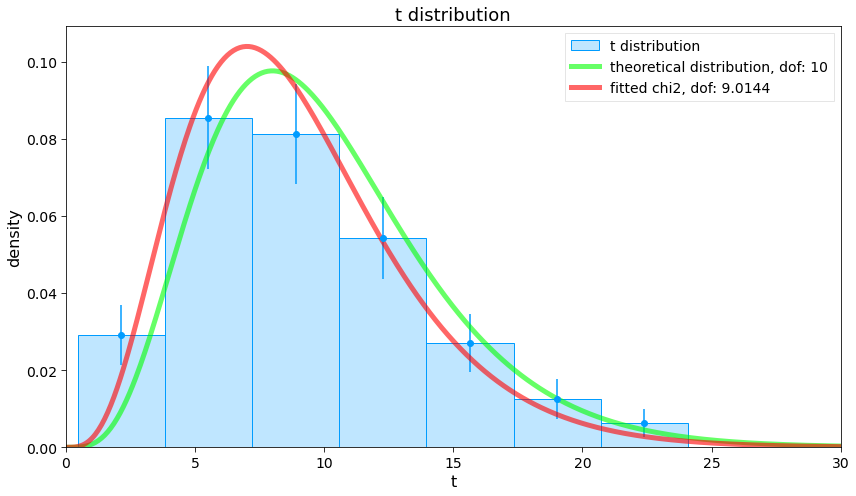

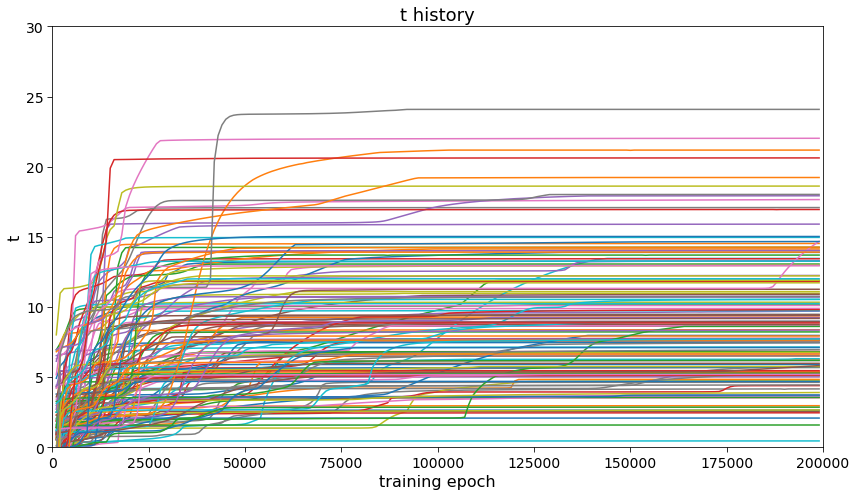

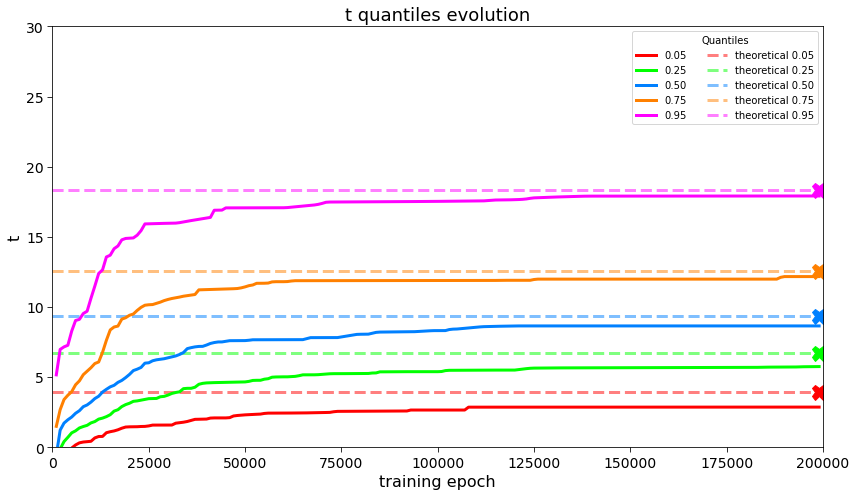

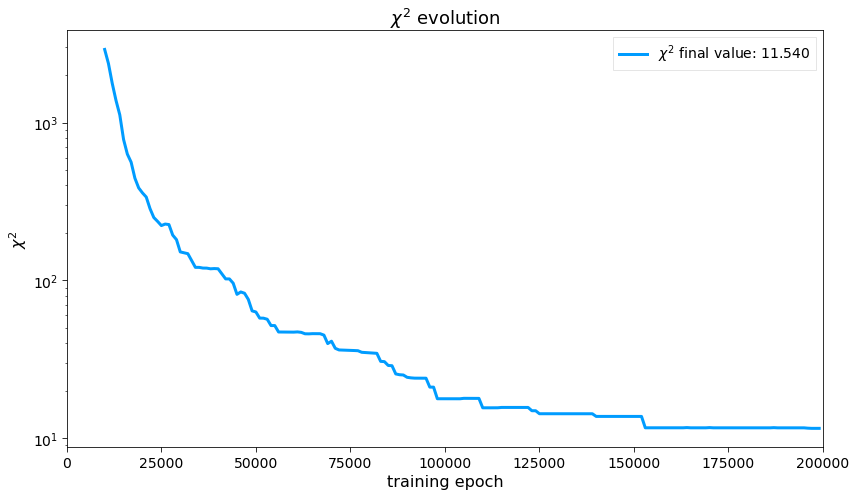

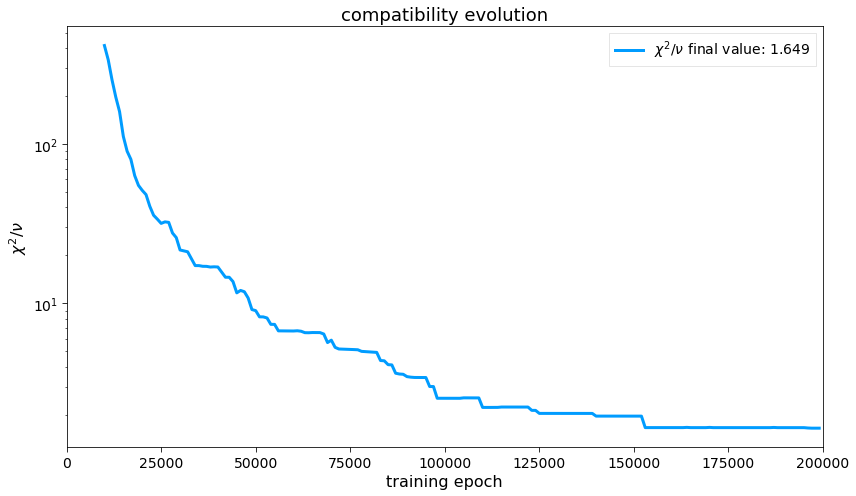

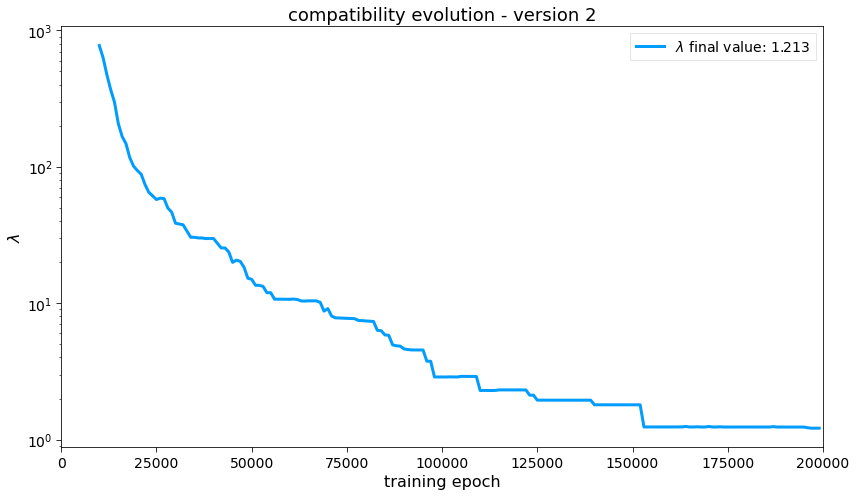

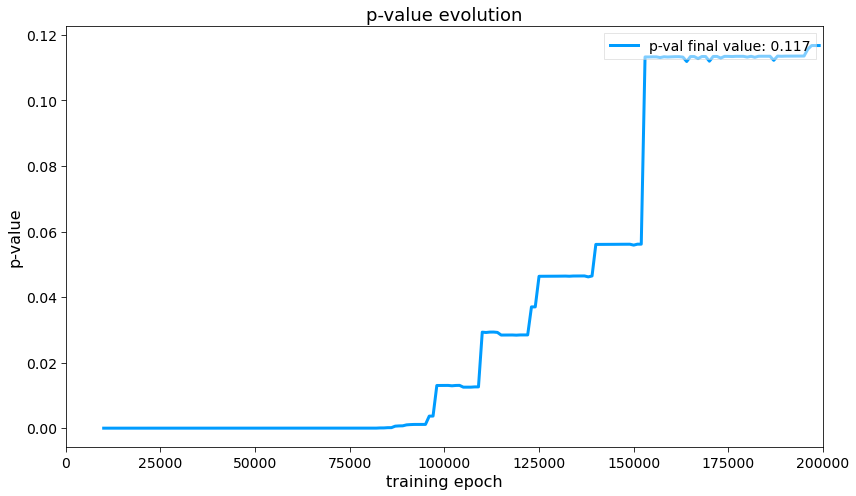

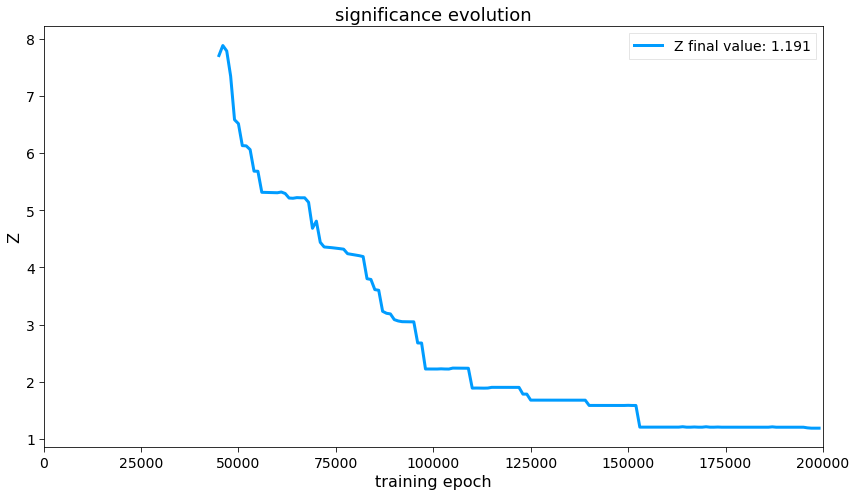

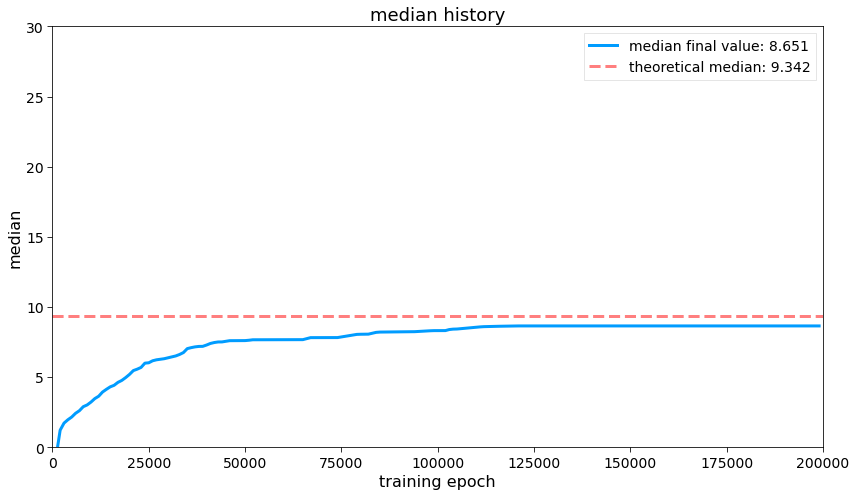

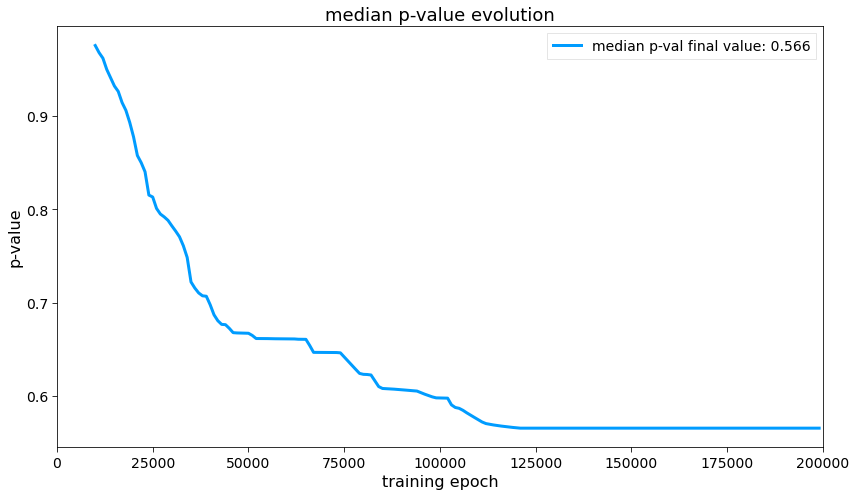

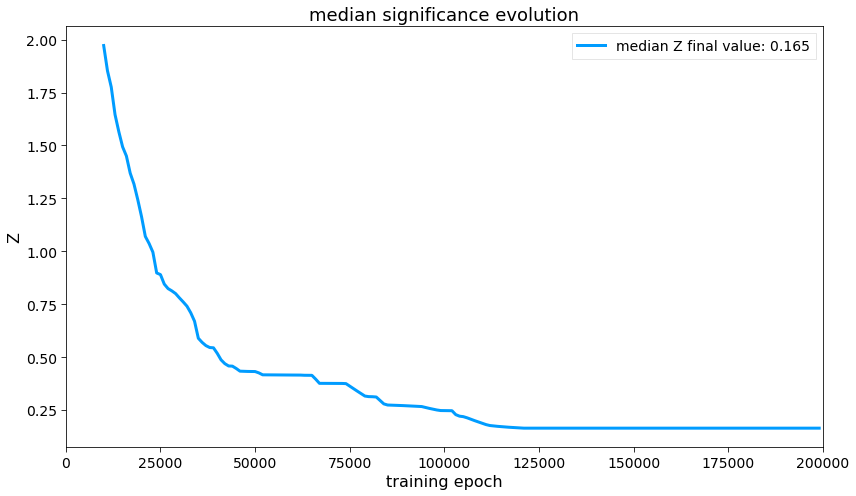

In [4]:
tDist.plotTdist()
tDist.plotThistory()
tDist.plotQuantilesEvo()
tDist.plotChi2History()
tDist.plotChi2Compatibility()
tDist.plotChi2Compatibility2()
tDist.plotPValHistory()
tDist.plotSignificanceHistory()
tDist.plotMedianHistory()
tDist.plotMedianPval()
tDist.plotMedianZ()

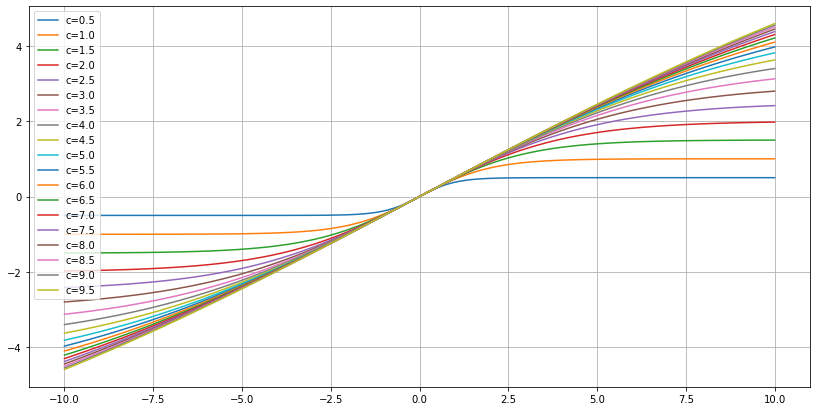

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def f(x, c):
    return c*((sigmoid(x/c) * 2) - 1) 

fig, ax = plt.subplots(figsize=(14,7))
x = np.linspace(-10,10,100)

const_list=[
    0.5,
    1.0,
    1.5,
]

for const in np.arange(0.5, 10, 0.5):
    ax.plot(x, f(x, const), label=f'c={const}')

ax.grid()

ax.legend(loc='best')

plt.show()